In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from missingpy import KNNImputer

In [2]:
train = pd.read_csv("C:/Users/kfir/Desktop/kfir/data science projects/projects practice/titanic/train.csv")
test = pd.read_csv("C:/Users/kfir/Desktop/kfir/data science projects/projects practice/titanic/test.csv")


understand the data, check for missing and outliers 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
for col in train.columns:
    print("---------------")
    print(col,":")
    print("---------------")
    print(train[col].value_counts())
    #.sort_values()
   

---------------
PassengerId :
---------------
891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
---------------
Survived :
---------------
0    549
1    342
Name: Survived, dtype: int64
---------------
Pclass :
---------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------
Name :
---------------
Mellors, Mr. William John                               1
Dimic, Mr. Jovan                                        1
Flynn, Mr. John     

data exploration summry:
------------------------------------
missing values: age 177 - check corr with target and impute, cabin 687 - change for binary and check contribution, Embarked 2 - delete 2 rows
<br>
outliers: parch, SibSp - we will check corr and asghin difrent categris
<br>
ticket - drop.
<br>
name - mybe extract merrige status
<br>
modle baseline = 0.38 Survived 0.62 did not e.g if we guess
<br>

In [6]:
prep_train = train.copy()
prep_train = prep_train.drop(columns = "Ticket")
prep_train = prep_train.dropna(subset = ["Embarked"])
prep_train['Cabin_cat'] = prep_train['Cabin'].fillna(0).apply(lambda x: 0 if x == 0 else 1)
prep_train['SibSp_cat'] = prep_train['SibSp'].apply(lambda x: 5 if x>=5 else x)
prep_train = prep_train.drop(columns = "SibSp")
prep_train['Parch_cat'] = prep_train['Parch'].apply(lambda x: 2 if x>=2 else x)
prep_train = prep_train.drop(columns = "Parch")
prep_train['Sex_cat'] = prep_train['Sex'].apply(lambda x: 0 if x == "female" else 1)
prep_train = prep_train.drop(columns = "Sex")
prep_train = prep_train.drop(columns = "Cabin")
cat_var = ["Sex_cat","SibSp_cat","Parch_cat","Cabin_cat","Embarked","Pclass"]
numric_var = ["Age","Fare","Age_impute"]
target  = "Survived"
prep_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Age            712 non-null float64
Fare           889 non-null float64
Embarked       889 non-null object
Cabin_cat      889 non-null int64
SibSp_cat      889 non-null int64
Parch_cat      889 non-null int64
Sex_cat        889 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


impute age 

In [7]:
prep_train["Age_impute"] = prep_train["Age"]
imputer = KNNImputer()
x = imputer.fit_transform(prep_train[["Age","Pclass","Fare","Sex_cat","Parch_cat","SibSp_cat","Cabin_cat"]])
x = imputer.fit_transform(prep_train[["Age","Survived"]])
prep_train["Age_impute"] = x[:,0]



C:\Users\kfir\Anaconda3\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


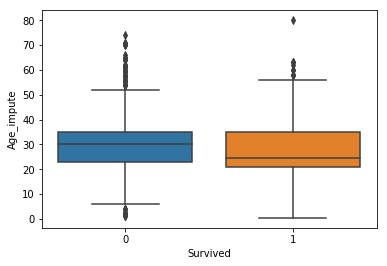

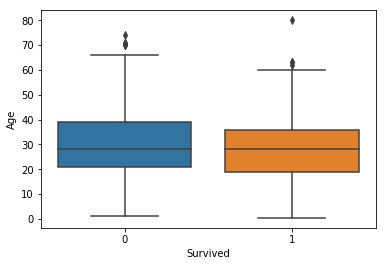

In [8]:
#ns.boxplot(x=prep_train[target],y=prep_train[var])
sns.boxplot(prep_train["Survived"], prep_train["Age_impute"])
plt.show()
sns.boxplot(prep_train["Survived"], prep_train["Age"])



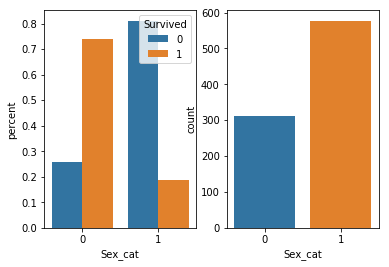

Survived    0    1
Sex_cat           
0          81  231
1         468  109
stat: 258.4266104463763 carmer's V: 0.538


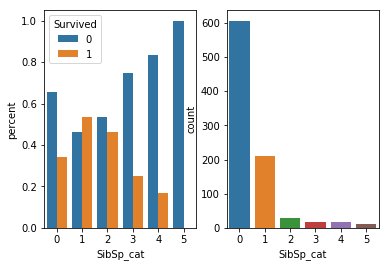

Survived     0    1
SibSp_cat          
0          398  208
1           97  112
2           15   13
3           12    4
4           15    3
5           12    0
stat: 37.741348475705145 carmer's V: 0.192


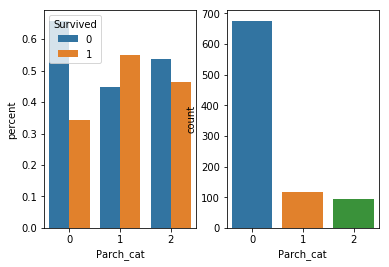

Survived     0    1
Parch_cat          
0          445  231
1           53   65
2           51   44
stat: 21.537059608833346 carmer's V: 0.148


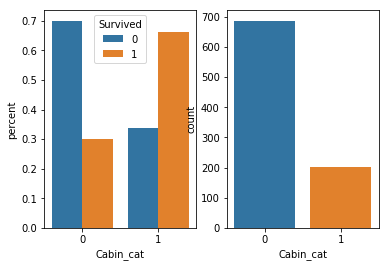

Survived     0    1
Cabin_cat          
0          481  206
1           68  134
stat: 85.80418269727531 carmer's V: 0.309


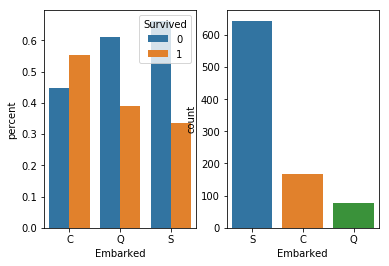

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
stat: 26.48914983923762 carmer's V: 0.166


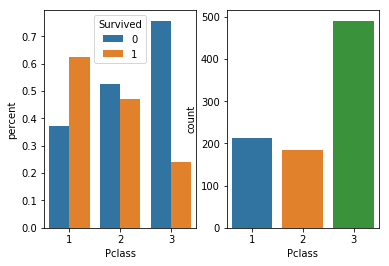

Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119
stat: 100.98040726128336 carmer's V: 0.334


In [9]:

for var in cat_var:
    plt.figure(var)
    plt.subplot(1,2,1)
    to_plot = prep_train.groupby([var])[target].value_counts(normalize = True).rename("percent").reset_index()
    sns.barplot(data = to_plot,x=var,y="percent", hue = target)
    plt.subplot(1,2,2)
    sns.countplot(prep_train[var])
    plt.show()
    table = pd.crosstab(prep_train[var],prep_train[target])
    chi, p, dof, exp  = chi2_contingency(table)
    n = table.sum().sum()
    phi2 = chi/n
    r,k = table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    print(table)
    print("stat:",chi,"carmer's V:","{:.3f}".format(corr))
    

Age
-----
               Age  Survived
Age       1.000000 -0.082446
Survived -0.082446  1.000000


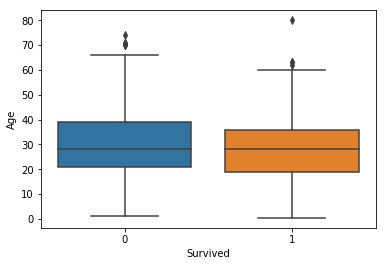

Fare
-----
             Fare  Survived
Fare      1.00000   0.25529
Survived  0.25529   1.00000


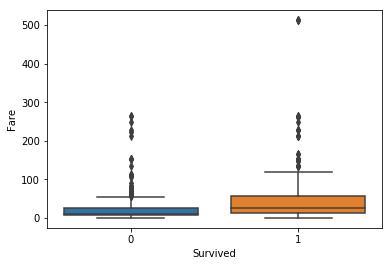

Age_impute
-----
            Age_impute  Survived
Age_impute    1.000000 -0.109081
Survived     -0.109081  1.000000


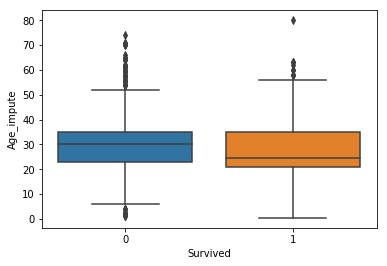

In [10]:
for var in numric_var:
    plt.figure()
    print(var)
    print("-----")
    sns.boxplot(x=prep_train[target],y=prep_train[var])
    print(pd.DataFrame(prep_train[[var,target]]).corr())
    plt.show()



# correlation's X

In [11]:
a = pd.DataFrame(columns=["var1","var2","caramer's V"])
ord_var_new = ord_var + bin_var + c_var
for i in ord_var + bin_var + c_var:
    ord_var_new.pop(0)
    for j in ord_var_new:
        confusion_matrix = pd.crosstab(prep_train[i],prep_train[j])
        chi2 = stats.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
        #corr, p = scipy.stats.spearmanr(prep_train[i],prep_train[j])
        a = a.append({"var1": i,"var2": j, "caramer's V": corr}, ignore_index = True)
print(a.sort_values(by = "caramer's V"))

NameError: name 'ord_var' is not defined

In [ ]:
prep_train[["Embarked","SibSp_cat"]].corr()

we can see that pclass and cabin_cat are correlated and also sibsp_cat and parch_cat 
<br>
sibsp_cat and parch_cat = we will make new var = sum(sibsp_cat,parch_cat) 
<br>
we leave for now and will see in the feture selection in CV

In [ ]:
sns.countplot(prep_train["Embarked"])

In [ ]:
len(train.columns)